<a href="https://colab.research.google.com/github/JMML2021/Sprint-8.-Algoritmes-d-aprenentatge-NO-supervisat-Agrupaci-/blob/main/Sprint_8_Algoritmes_d%E2%80%99aprenentatge_NO_supervisat_Agrupaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
 

time: 11.8 ms (started: 2022-08-31 17:46:12 +00:00)


In [110]:
#!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.77 s (started: 2022-08-31 17:46:12 +00:00)


In [111]:
# autotime extension

# %load_ext autotime



# Creo que puedo quitar esta línea

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.04 ms (started: 2022-08-31 17:46:16 +00:00)


In [112]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

time: 1.62 ms (started: 2022-08-31 17:46:16 +00:00)


In [113]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4.67 s (started: 2022-08-31 17:46:16 +00:00)


In [114]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/Publicacions Facebook Thailandia.csv')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  7050 filas con 16 columnas

Imprimo el primer registro, solo para ver como es:



ï»¿status_id        246675545449582_1649696485147474
status_type                                    video
status_published                      4/22/2018 6:00
num_reactions                                    529
num_comments                                     512
num_shares                                       262
num_likes                                        432
num_loves                                         92
num_wows                                           3
num_hahas                                          1
num_sads                                           1
num_angrys                                         0
Column1                                          NaN
Column2                                          NaN
Column3                                          NaN
Column4                                          NaN
Name: 0, dtype: object

time: 49.2 ms (started: 2022-08-31 17:46:20 +00:00)


In [115]:
df1.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


time: 31.9 ms (started: 2022-08-31 17:46:21 +00:00)


In [116]:
#Verifico la calidad de los datos y veo si hay nulos.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [117]:
# SBusco nulos

(df1.isnull() | df1.empty | df1.isna()).sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

time: 21.5 ms (started: 2022-08-31 17:46:21 +00:00)


In [118]:
df1.columns

Index(['ï»¿status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

time: 10.7 ms (started: 2022-08-31 17:46:21 +00:00)


# 1.- Data analysis
Basic statistical analysis

Modelo de como hacer la limpieza de datos

https://www.kaggle.com/code/jaganadhg/fb-live-selling-data-analysis#More-to-Analyze!

In [119]:
# 
# Hacemos uan estadistica báscia de los datos continuos

df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


time: 57.8 ms (started: 2022-08-31 17:46:21 +00:00)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80704859d0>,
      dtype=object)

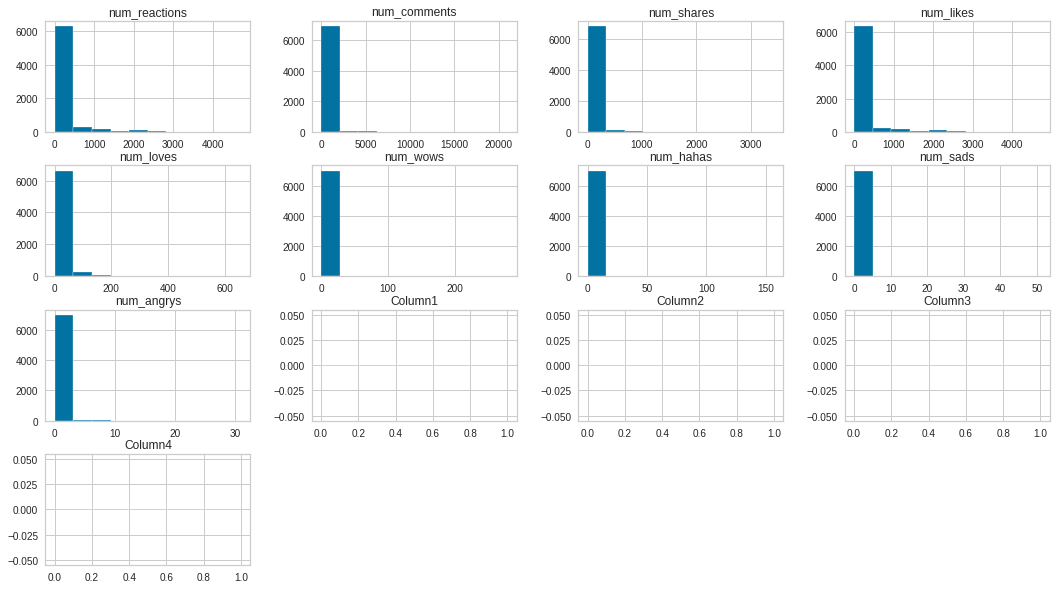

time: 4.66 s (started: 2022-08-31 17:46:21 +00:00)


In [120]:
#
#Hacemos histogramas de todas las variables
 
df1[df1.columns].hist(figsize=(18,10))

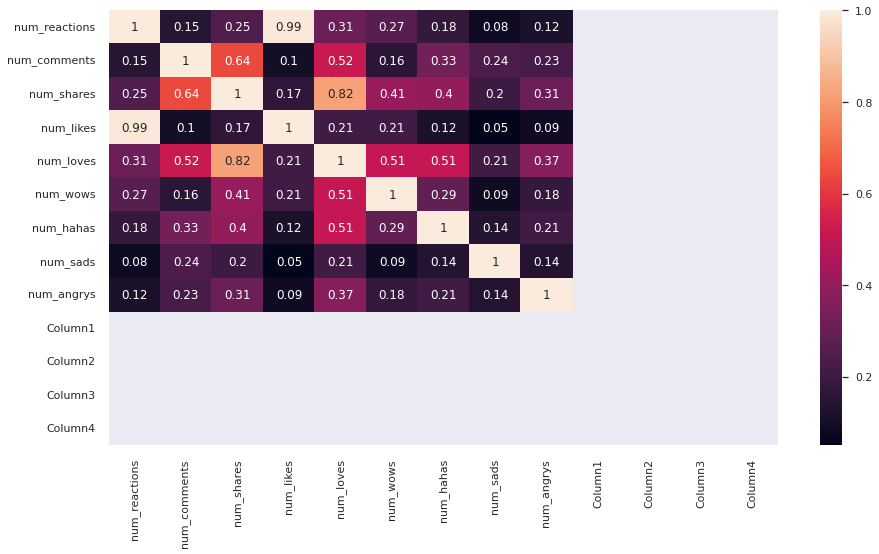

time: 1.26 s (started: 2022-08-31 17:46:25 +00:00)


In [121]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb#scrollTo=lzjdcUxTCQaG

Creacion de 4 nuevas  columnas:
year
month
day
hour

---



In [122]:
df1['status_published'] = pd.to_datetime(df1['status_published'])

df1['year'] = df1['status_published'].dt.year
df1['month'] = df1['status_published'].dt.month
df1['day'] = df1['status_published'].dt.day
df1['hour'] = df1['status_published'].dt.hour

#df1 = df1.drop(['status_id'], axis=1) #quito esta columna

time: 1.39 s (started: 2022-08-31 17:46:27 +00:00)


# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

## 1.1 Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

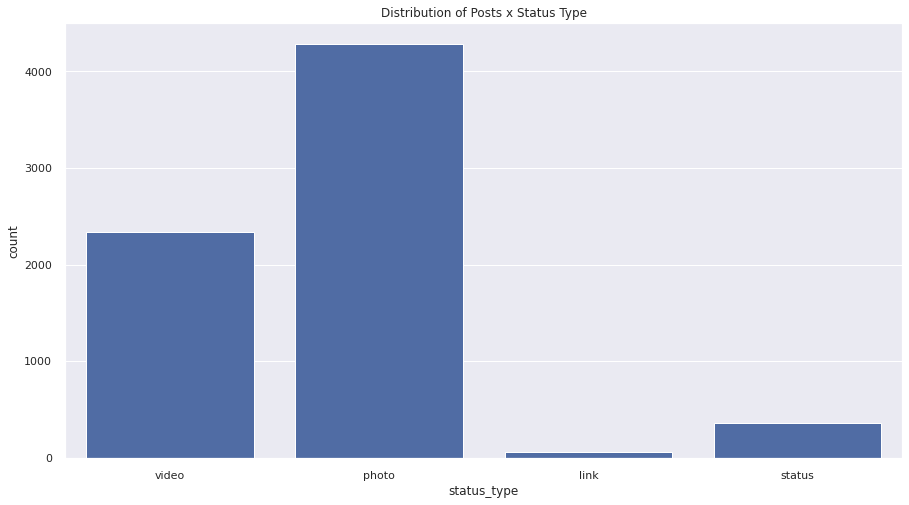

time: 450 ms (started: 2022-08-31 17:46:28 +00:00)


In [123]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

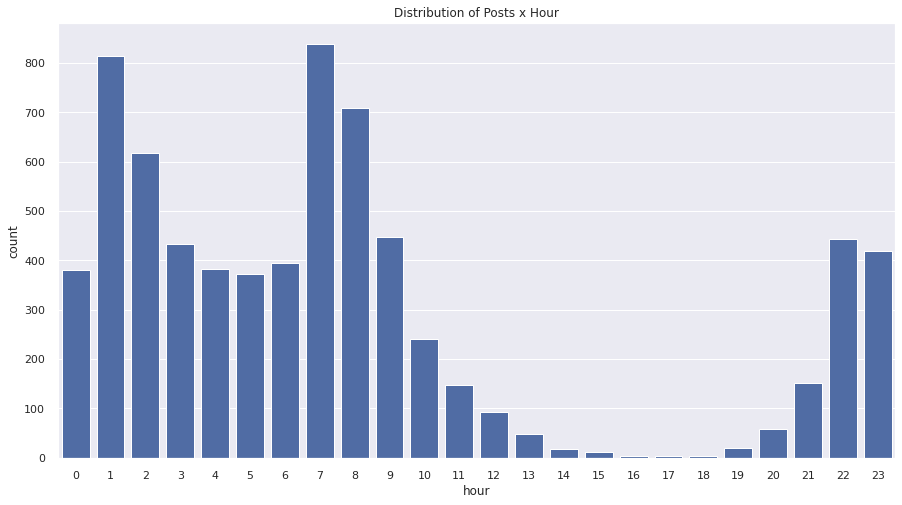

time: 785 ms (started: 2022-08-31 17:46:29 +00:00)


In [124]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["hour"], palette= pal)
pl.set_title("Distribution of Posts x Hour")
plt.show()

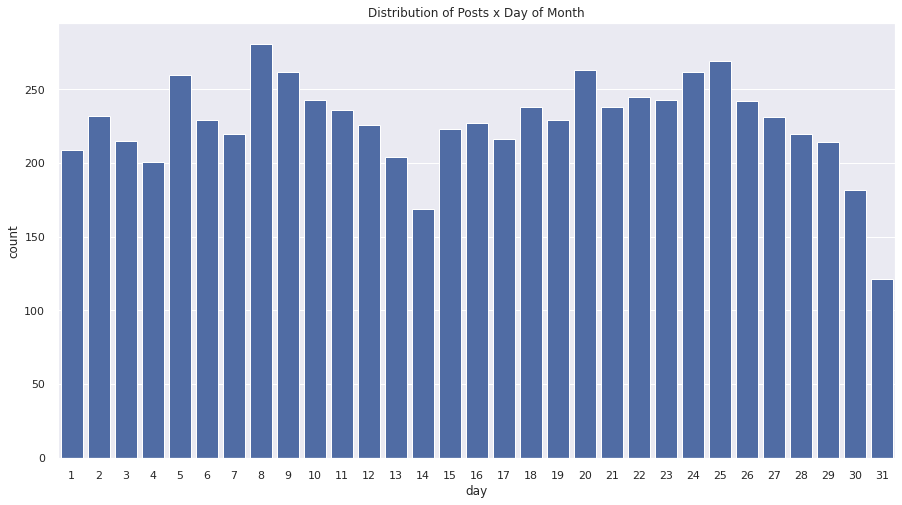

time: 825 ms (started: 2022-08-31 17:46:29 +00:00)


In [125]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["day"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

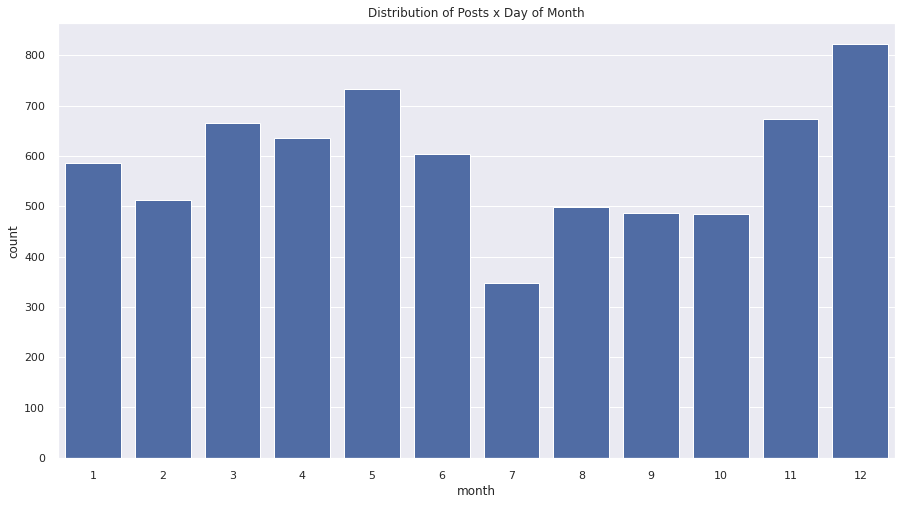

time: 615 ms (started: 2022-08-31 17:46:30 +00:00)


In [126]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["month"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

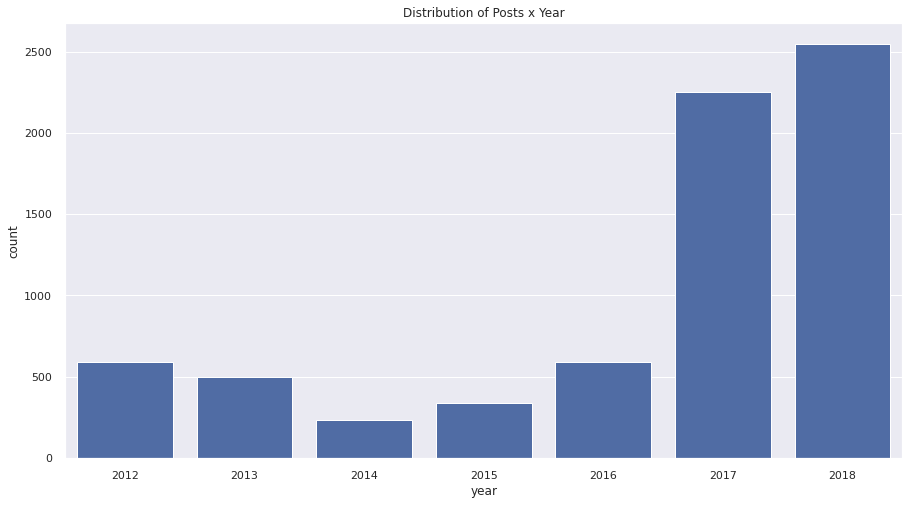

time: 408 ms (started: 2022-08-31 17:46:31 +00:00)


In [127]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["year"], palette= pal)
pl.set_title("Distribution of Posts x Year")
plt.show()

[texto del enlace](https://)# Nueva sección

## 1.1 Selección de variables

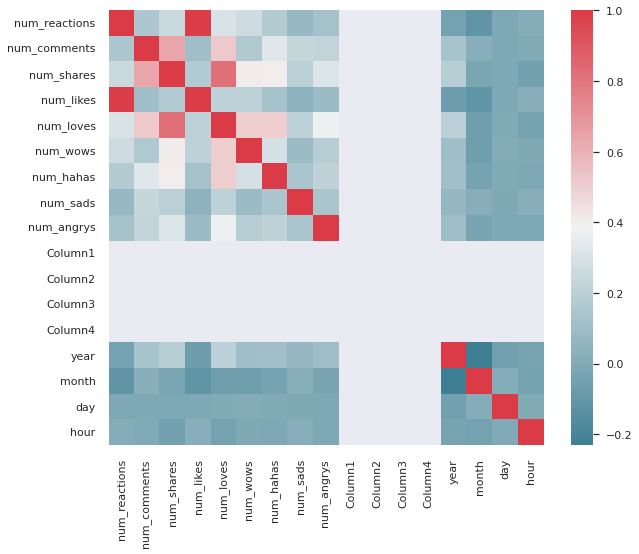

time: 955 ms (started: 2022-08-31 17:46:31 +00:00)


In [128]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [129]:

# Elimino las columnas vacias


df1= df1.drop(['Column1', 'Column2','Column3','Column4'], axis=1)

time: 12.4 ms (started: 2022-08-31 17:46:32 +00:00)


La correlacion esta en:
num_reactions
num_loves
year
num_comments

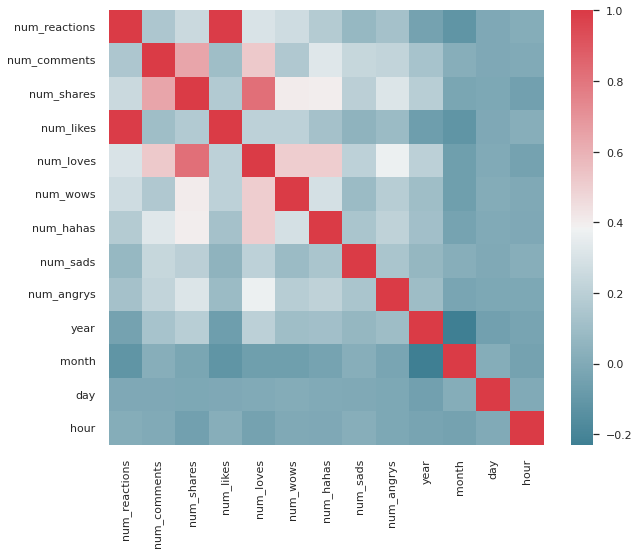

time: 1.04 s (started: 2022-08-31 17:46:32 +00:00)


In [130]:
# Hago un mapa de calor para buscar las correlaciones entre los factores

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [131]:
# Elimino los factores con poca relacion con respecto al "nº de likes"


#df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments', 'hour', 'day', 'month', 'ï»¿status_id'], axis=1)
df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments',  'day',  'ï»¿status_id'], axis=1)

time: 4.9 ms (started: 2022-08-31 17:46:33 +00:00)


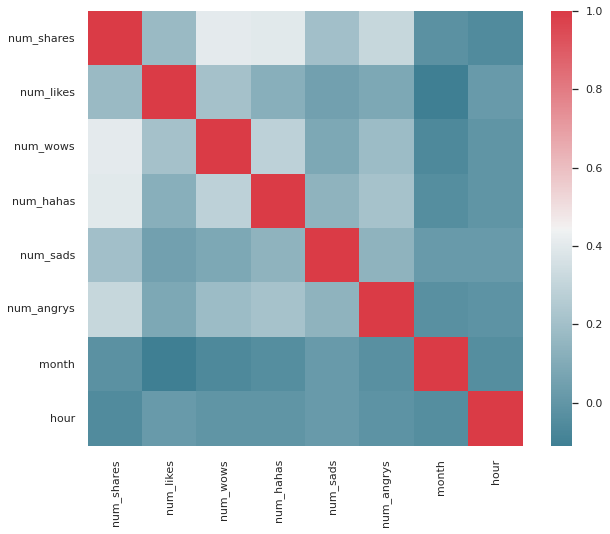

time: 768 ms (started: 2022-08-31 17:46:33 +00:00)


In [132]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [133]:
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}

time: 1.03 ms (started: 2022-08-31 17:46:34 +00:00)


In [134]:
df1.status_type = [s_type[item] for item in df1.status_type]

time: 20.1 ms (started: 2022-08-31 17:46:34 +00:00)


In [135]:
df1 = df1.drop('status_published', axis=1)

time: 5.9 ms (started: 2022-08-31 17:46:34 +00:00)


In [136]:
df1.iloc[10:15]

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour
10,2,3,202,1,0,0,0,4,1
11,2,0,213,4,0,0,0,4,2
12,2,2,305,2,0,0,0,4,5
13,2,0,200,1,0,0,0,4,2
14,2,0,335,1,0,0,0,4,9


time: 24.5 ms (started: 2022-08-31 17:46:34 +00:00)


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   hour         7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB
time: 21 ms (started: 2022-08-31 17:46:34 +00:00)


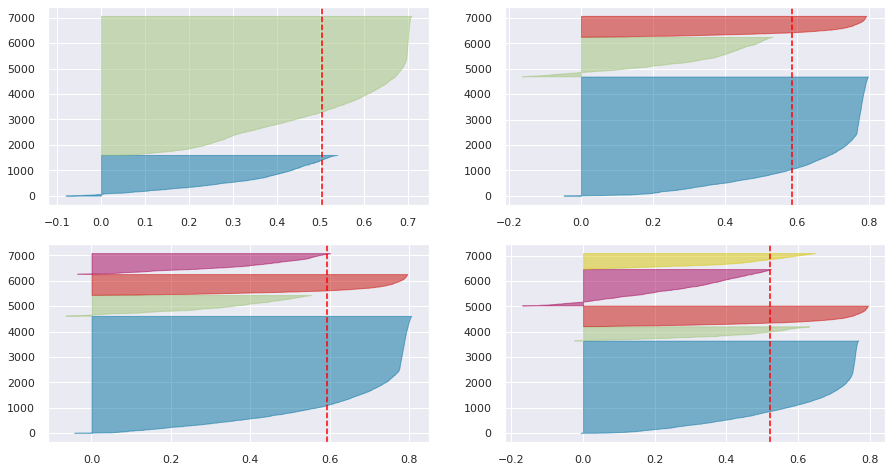

time: 17.6 s (started: 2022-08-31 17:46:34 +00:00)


In [138]:
# Selecciono el numero de cluster  con el analsiis Silhouette basado en KMeans

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Creamos una instancia de KMeans para cla cluster 
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Creamos la instancia de SilhouetteVisualizer instance de cada KMeans
    y lo visualizamos
    '''
    visualizador = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizador.fit(data_scaled)

La Curva Elbow nos indica que 4 es un número apropiado de clusteres.

Por otro lado, tal como se puede ver en los gráficos del análisis con Silhouette, los mejores resultados se obtienen con 3 y 4 clusters.

Con 4 clusters, el score promedio es más alto que con 3 clusters (0,6 frente a 0.59). Sin embargo con 4, el tamaño de los clusters es más uniforme, además que cada cluster tiene un score superior al score promedio.

Por tanto nos quedamos con 3 clusters.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## Elegir el mejor numero de cluster para el K-means

In [139]:
# choosing the best number of clusters using the silhouette score
from sklearn import metrics
from sklearn.cluster import KMeans

Knumber=[]
CHnumber=[]

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433008799659)
For n_clusters = 3, silhouette score is 0.8070206243340337)
For n_clusters = 4, silhouette score is 0.6338181280272261)
For n_clusters = 5, silhouette score is 0.6355162380762893)
For n_clusters = 6, silhouette score is 0.6370859426989179)
For n_clusters = 7, silhouette score is 0.6834367723238465)
For n_clusters = 8, silhouette score is 0.6558769757425096)
For n_clusters = 9, silhouette score is 0.649700124183313)
time: 11.2 s (started: 2022-08-31 17:46:52 +00:00)


Text(0, 0.5, 'Calinski-Harabasz Indice')

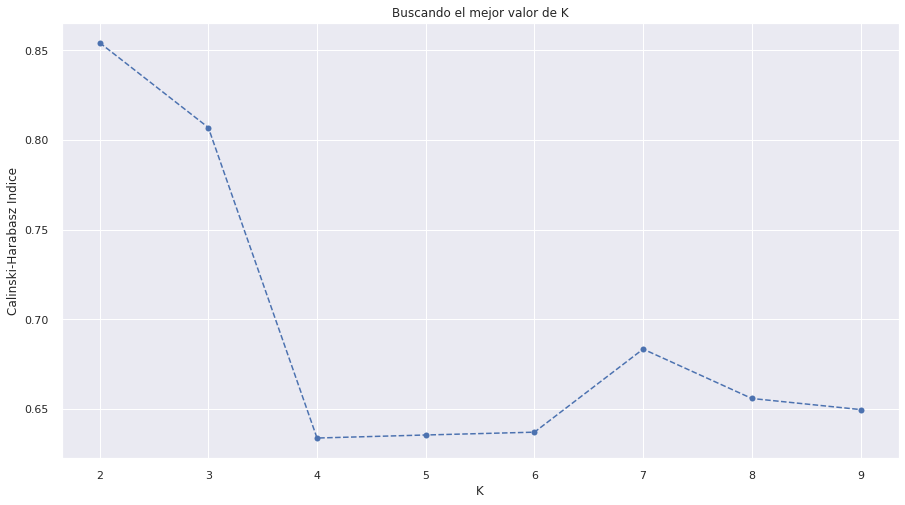

time: 357 ms (started: 2022-08-31 17:47:03 +00:00)


In [140]:
plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

In [141]:
# k-means clustering


clustering_kmeans = KMeans(n_clusters=3)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

time: 352 ms (started: 2022-08-31 17:47:04 +00:00)


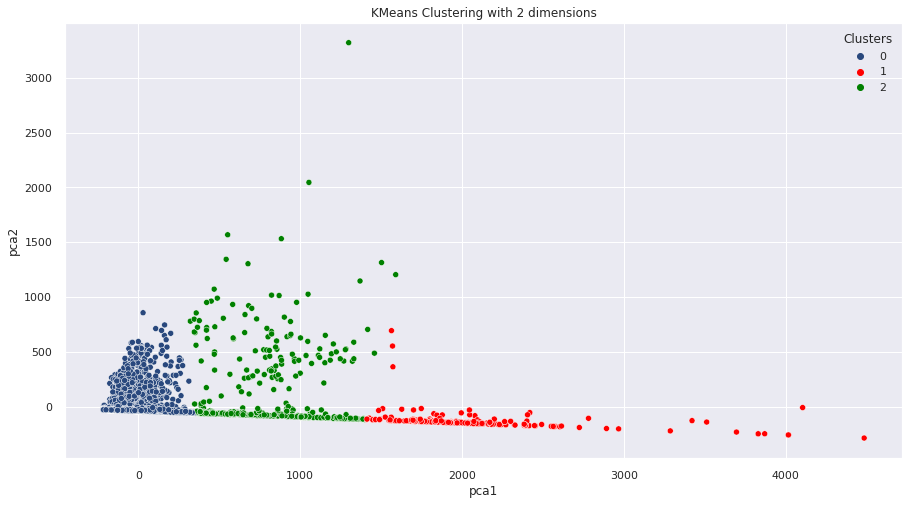

time: 668 ms (started: 2022-08-31 17:47:04 +00:00)


In [142]:
# Para una mejor intrerpretacion de los datos vamos a transformar la base de datos por medio del PCA (Principal Component Analisys)


reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "red", 'green']

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()


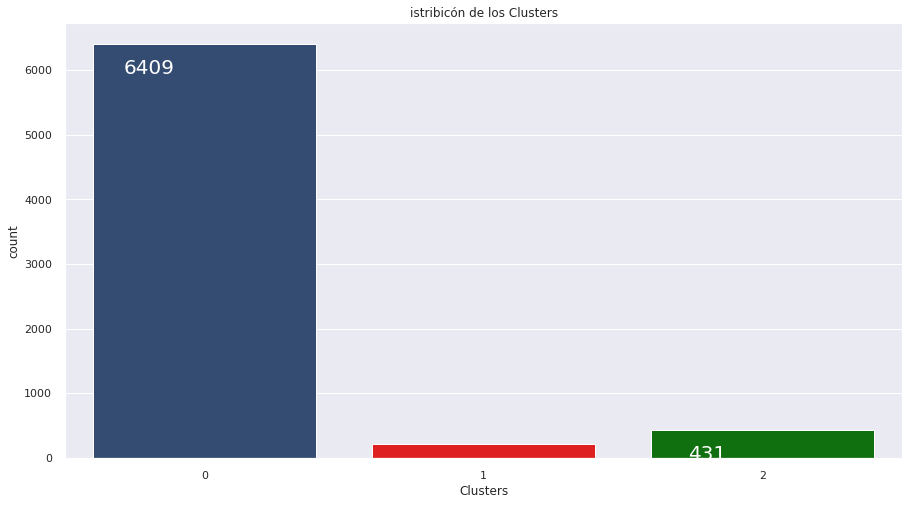

time: 204 ms (started: 2022-08-31 17:47:05 +00:00)


In [143]:
# Cantidad de datos por cluster
pl = sns.countplot(x=df1["Clusters"], palette= pal, data=df1)
pl.set_title("istribicón de los Clusters")


for p in pl.patches:
    pl.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+112), ha='center', va='top', color='white', size=20)

plt.show()

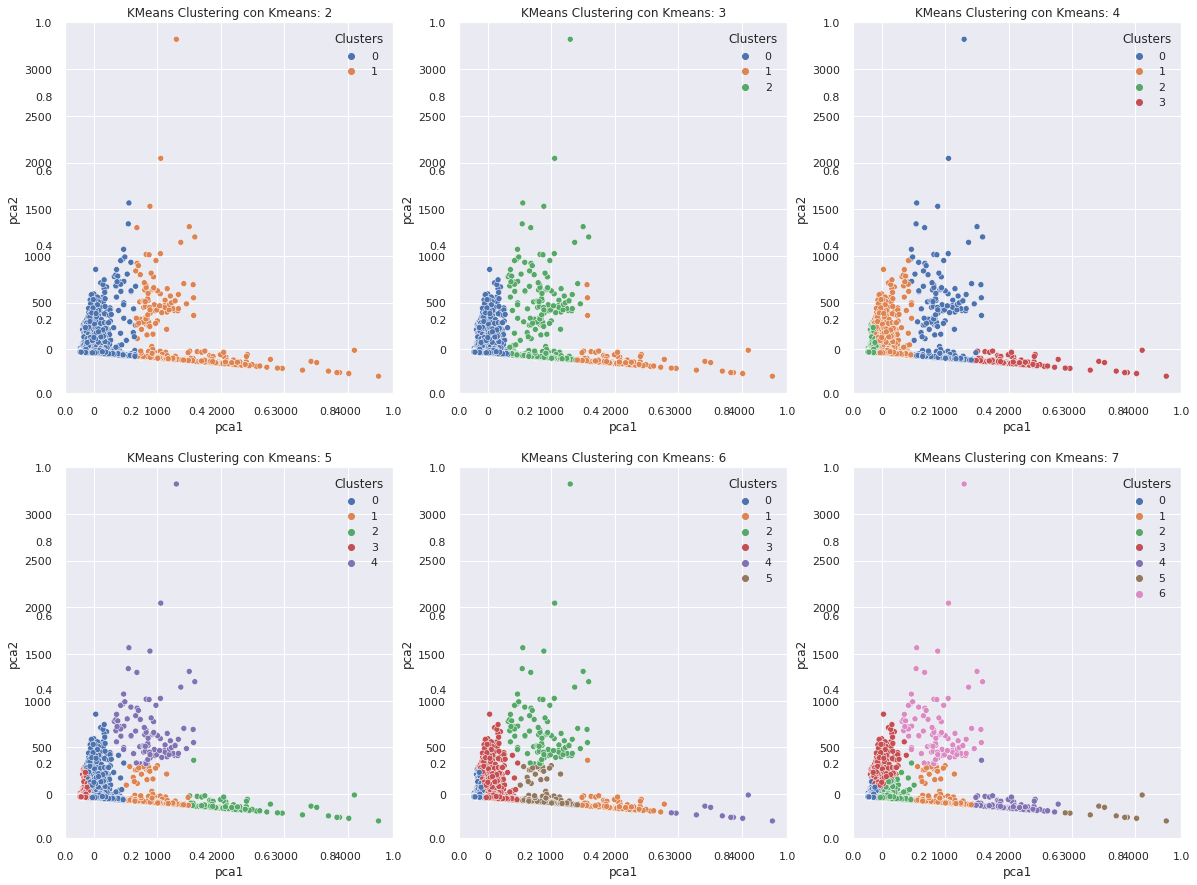

time: 6.33 s (started: 2022-08-31 17:47:05 +00:00)


In [144]:
# comparo para cada tipo de cluster para ver como afecta:
  # k-means clustering
 
fig, axes = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)


for n in range (2,8):
 

  axes = fig.add_subplot(2, 3, n-1)
  clustering_kmeans = KMeans(n_clusters=n)
  df1['Clusters'] = clustering_kmeans.fit_predict(df1)
  sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette='deep')
  plt.title('KMeans Clustering con Kmeans: '+ str(n))
plt.show()



In [145]:
df1['Clusters'].value_counts()

0    4973
2     959
3     555
1     262
4     191
6      97
5      13
Name: Clusters, dtype: int64

time: 7.56 ms (started: 2022-08-31 17:47:11 +00:00)


http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python

Ejemplo de clustering con k-means en Python

## 1.3 Se normalizan los datos con MinMax()

In [146]:
#%% Se normalizan los datos con MinMax()

from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler() 
df1_escalado = min_max_scaler.fit_transform(df1)
df1_escalado = pd.DataFrame(df1_escalado) # Hay que convertir a DF el resultado.
#df1_escalado = df1_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

time: 15.5 ms (started: 2022-08-31 17:47:11 +00:00)


## 1.4 Se normailiza con normalize

In [ ]:
# Normalizo los datos:

from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
data_scaled.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour,Clusters
0,0.001979,0.51850,0.854931,0.005937,0.001979,0.001979,0.0,0.007916,0.011874,0.0
1,0.013186,0.00000,0.988985,0.000000,0.000000,0.000000,0.0,0.026373,0.145051,0.0
2,0.004718,0.26894,0.962521,0.004718,0.004718,0.000000,0.0,0.018873,0.028309,0.0
3,0.018000,0.00000,0.999027,0.000000,0.000000,0.000000,0.0,0.036001,0.018000,0.0
4,0.009801,0.00000,0.999652,0.000000,0.000000,0.000000,0.0,0.019601,0.014701,0.0


time: 22.4 ms (started: 2022-08-31 17:50:54 +00:00)


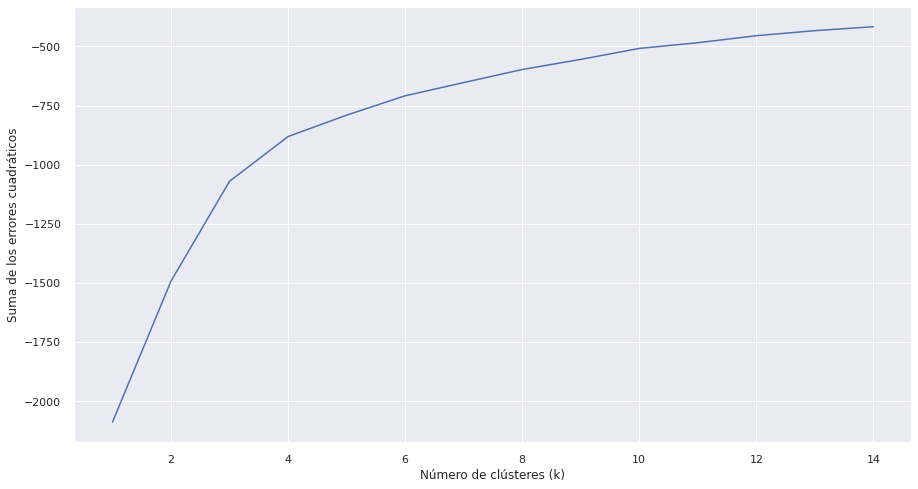

time: 7.42 s (started: 2022-08-31 17:47:11 +00:00)


In [147]:


#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 15) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df1_escalado).score(df1_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curva elbow nos muestra que un valor de **k = 4** puede ser apropiado. No hay una solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución escogida.

https://www.kaggle.com/code/jaganadhg/fb-live-selling-data-analysis#More-to-Analyze!

For n_clusters = 2, silhouette score is 0.2548818201079535)
For n_clusters = 3, silhouette score is 0.1788014364155891)
For n_clusters = 4, silhouette score is 0.17298406415911613)
For n_clusters = 5, silhouette score is 0.14421673551952846)
For n_clusters = 6, silhouette score is 0.1421096760098637)
For n_clusters = 7, silhouette score is 0.14593174077112248)
For n_clusters = 8, silhouette score is 0.08943881477159454)
For n_clusters = 9, silhouette score is 0.0860943311911106)


Text(0, 0.5, 'Calinski-Harabasz Indice')

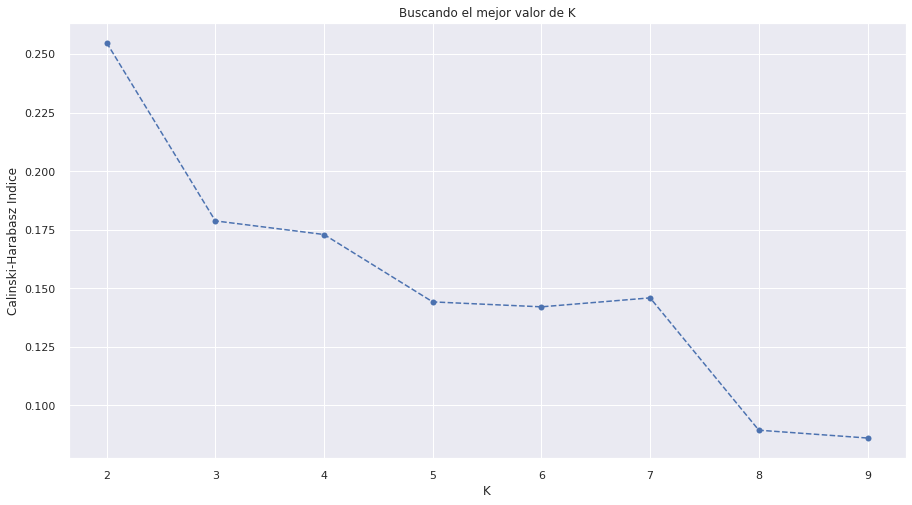

time: 10.1 s (started: 2022-08-31 18:13:05 +00:00)


In [167]:
# Miro si con la transformacion va mejor o no 31.08/2022



Knumber=[]
CHnumber=[]

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1_escalado, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

## Function for undersampling

In [148]:
def downsample(df1, label_col_name):
    # encontrar el número de observaciones en el grupo más pequeño
    nmin = df1[label_col_name].value_counts().min()
    return (df1
            # dividir el df por grupos
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombinamos los df
            .reset_index(drop=True)
            )

time: 2.23 ms (started: 2022-08-31 17:47:19 +00:00)


In [185]:
df_us = downsample(df1, 'Clusters')

time: 11.8 ms (started: 2022-08-31 19:29:53 +00:00)


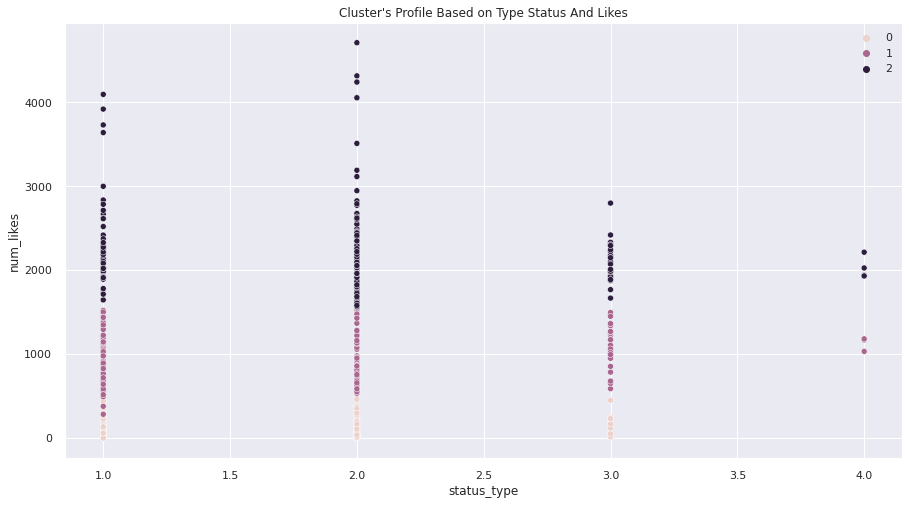

time: 415 ms (started: 2022-08-31 19:30:11 +00:00)


In [187]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["status_type"], y=df_us["num_likes"], hue=df_us["Clusters"]) #, palette= pal)
pl.set_title("Cluster's Profile Based on Type Status And Likes")
plt.legend()
plt.show()

In [ ]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cantidad de cluster por like y hora")
plt.legend()
plt.show()

In [ ]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["month"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cantidad de cluster por like y mes")
plt.legend()
plt.show()

Perfil del clúster basado en interacciones y gustos
Podemos ver que, independientemente de la cantidad de likes, cuando tenemos alrededor de 1000 likes es cuando tenemos la mayor cantidad de wows.

No hay mucha diferencia entre los dos grupos en este análisis, el número de hahas por lo general nunca pasa de los 30

De nuevo, no hay mucha diferencia, el número de sads suele estar entre 0 y 5.

El número de angrys nunca fluctúa tanto, por lo general está alrededor de 0 - 5

In [ ]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Wows And Likes")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hahas And Likes")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Sads And Likes")
plt.legend()
plt.show()

pl4 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl4.set_title("Cluster's Profile Based on Angrys And Likes")
plt.legend()
plt.show()

In [ ]:
# hour x num_x
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Hour And Wows")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hour And Hahas")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Sads")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Angrys")
plt.legend()
plt.show()



**Conclusión**

Se puede concluir que el clúster 0 tiene vendedores que en general son menos populares. Por otro lado, los vendedores del clúster 1 tienen vendedores que son súper populares.

Como vimos en el gráfico "Perfil del clúster basado en acciones y me gusta", los vendedores del clúster 0 tienen menos acciones y menos me gusta que los vendedores del clúster 1.

En el siguiente gráfico "Perfil del clúster basado en tipo de estado y me gusta", los vendedores del clúster 0, independientemente del tipo de estado, siempre tienen menos me gusta que los vendedores del clúster 1.

En el gráfico "Perfil del clúster basado en Me gusta y hora" pudimos concluir que nuevamente los vendedores del clúster 1 tienen más Me gusta que los vendedores del clúster 0 independientemente de la hora del día.

Pero también podemos concluir que entre las 15:00 y las 20:00 no es un buen momento para publicar porque no hay muchos "me gusta" a esta hora del día.

Con base en el gráfico "Perfil del clúster según los Me gusta y el mes", podemos concluir que no hay un mes que tenga muchos más Me gusta que el otro y, una vez más, los vendedores del clúster 1 tienen más Me gusta que el vendedor del clúster 0.

En cuanto al número de interacciones con las publicaciones (wow, hahas, sads y angrys), el número de likes no influye mucho.

En cuanto a la hora de la publicación, se puede ver claramente que entre las 5:00 y las 10:00 hay más interacciones que en cualquier otro momento del día.

# - Exercici 2


## Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

In [151]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

clustering_kmeans = AgglomerativeClustering(n_clusters=3)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

time: 1.86 s (started: 2022-08-31 17:50:51 +00:00)


In [152]:
df1['Clusters']


0       0
1       0
2       0
3       0
4       0
       ..
7045    0
7046    0
7047    0
7048    0
7049    0
Name: Clusters, Length: 7050, dtype: int64

time: 10.2 ms (started: 2022-08-31 17:50:53 +00:00)


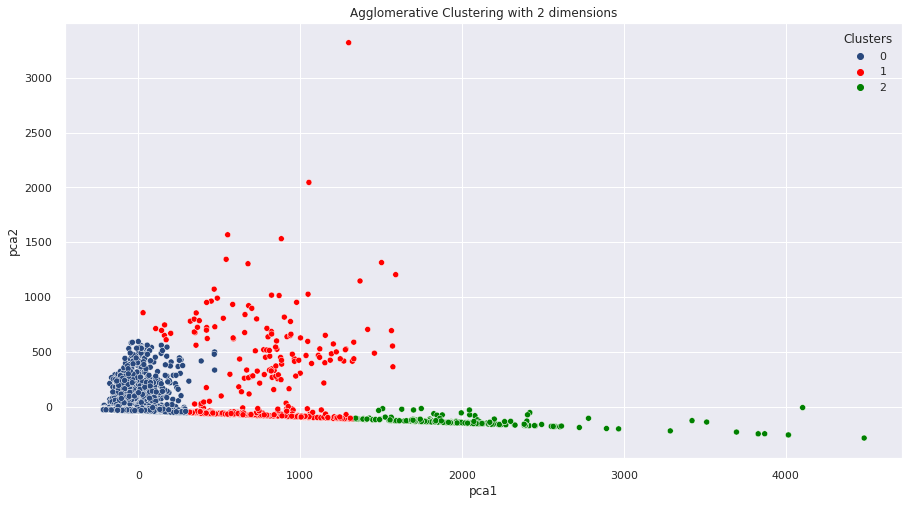

time: 580 ms (started: 2022-08-31 17:50:53 +00:00)


In [153]:
# Para visualizarlo mejor transformamos todas las columnas a dos por medio del PCA

reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

**Resultado:**
Ver lo bien que hemos separado los 3 clusters



---



https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Documentacion de ITAcademy

---



## 2.1 Dendograma - Hierartichical Clustering.

Explicacion del metodo 'ward' 

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

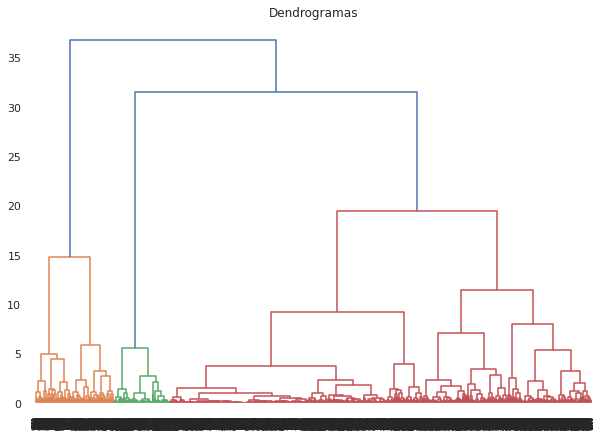

time: 3min 54s (started: 2022-08-31 17:50:54 +00:00)


In [155]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Encontrar un número interesante de clusters en un dendrograma es lo mismo que encontrar el espacio horizontal más grande que no tiene líneas verticales (el espacio con las líneas verticales más largas). Esto significa que hay más separación entre los grupos.

Podemos dibujar una línea horizontal que pase por esa distancia más larga: En este caso par y=17, luego nos da 4 clusters.

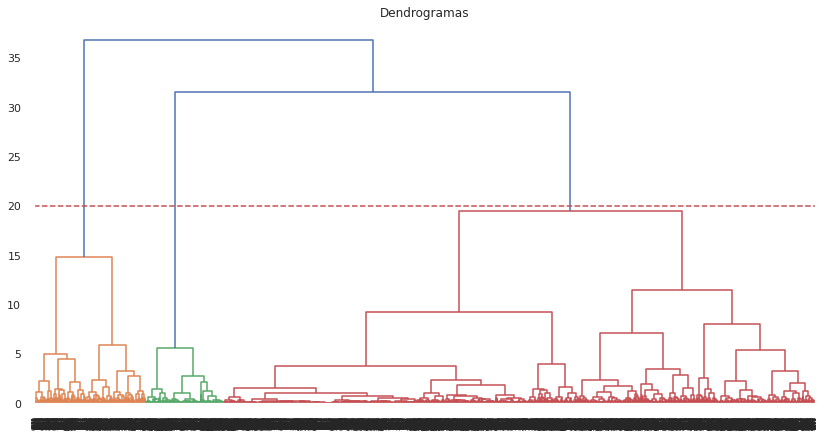

time: 3min 24s (started: 2022-08-31 17:54:48 +00:00)


In [156]:
plt.figure(figsize=(14, 7))  
plt.title("Dendrogramas")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=17, color='r', linestyle='--')

In [157]:
# Dibujaremos los 4 cluster en el grafico PCA, porque reducimos la cantidad de 
# factores y es más fácil de entender y visualizar los cluster

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([3, 3, 3, ..., 0, 3, 1])

time: 1.83 s (started: 2022-08-31 17:58:13 +00:00)


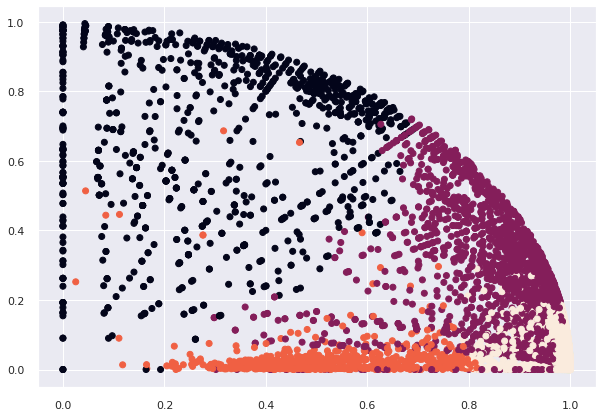

time: 643 ms (started: 2022-08-31 17:58:14 +00:00)


In [158]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['num_likes'], data_scaled[ 'hour'], c=cluster.labels_) 

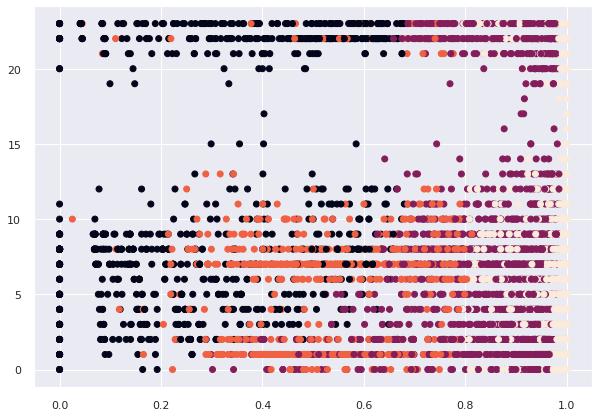

time: 614 ms (started: 2022-08-31 17:58:15 +00:00)


In [159]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['num_likes'], df1[ 'hour'], c=cluster.labels_) 

# - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

## Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [160]:
# Elegir el mejor número de grupos utilizando silhouette score
from sklearn import metrics
Knumber=[]
CHnumber=[]

rango_n_clusters = list(range(2,10))

for n_clusters in rango_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433129246312)
For n_clusters = 3, silhouette score is 0.8076059648529251)
For n_clusters = 4, silhouette score is 0.6338222603758835)
For n_clusters = 5, silhouette score is 0.6353884226342777)
For n_clusters = 6, silhouette score is 0.6368747603214087)
For n_clusters = 7, silhouette score is 0.6834366909369866)
For n_clusters = 8, silhouette score is 0.6562697713744683)
For n_clusters = 9, silhouette score is 0.6497287153490883)
time: 10.5 s (started: 2022-08-31 17:58:16 +00:00)


Text(0, 0.5, 'Calinski-Harabasz Indice')

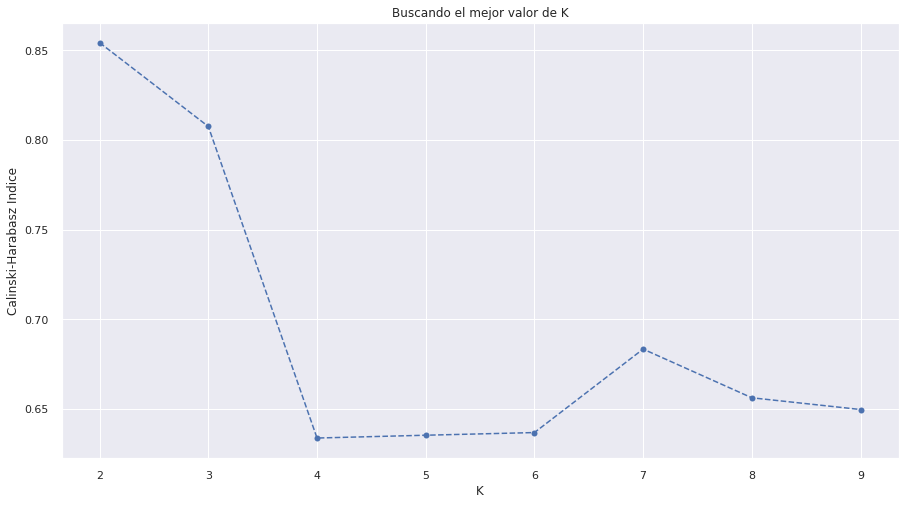

time: 367 ms (started: 2022-08-31 17:58:26 +00:00)


In [161]:
#%%timeit
#print('******')

plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

#%lprun -f 

In [162]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(1000000)

ModuleNotFoundError: ignored

time: 16.5 ms (started: 2022-08-31 17:58:27 +00:00)


In [180]:
# k-means clustering
clustering_kmeans = KMeans(n_clusters=4)
df['Clusters'] = clustering_kmeans.fit_predict(df1)

time: 295 ms (started: 2022-08-31 19:28:38 +00:00)


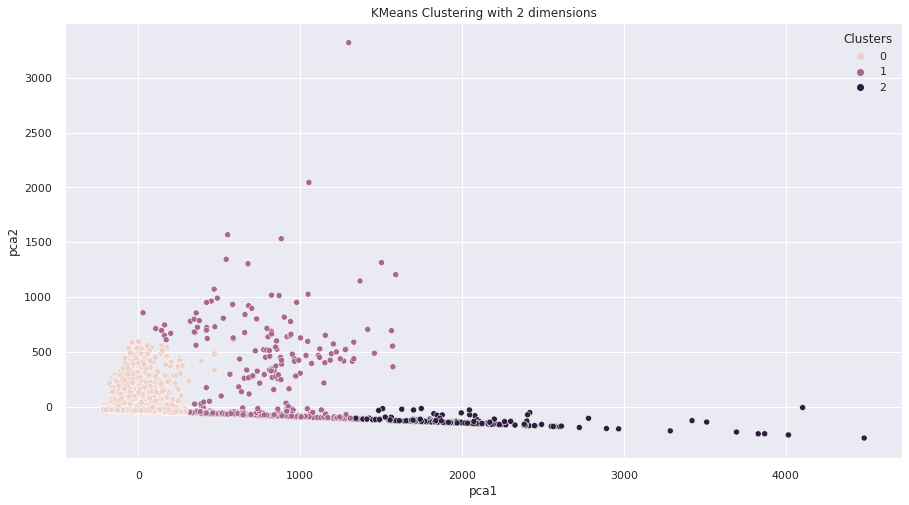

time: 575 ms (started: 2022-08-31 19:28:41 +00:00)


In [181]:
reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

pal = ['green','orange', 'red', 'blue']
sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results) #, palette= pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()